<a href="https://colab.research.google.com/github/ManjaxX/Temas2023/blob/main/Copia_de_EDO_SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuaciones Diferenciales Ordinarias con SciPy

## Ejemplo: Concentración de sal en un tanque

Encuentre la ecuación diferencial para la sal acumulada en untanque para cualquier tiempo. La concentración de sal es la masa de sal por unidad de volumen de la mezcla. Suponer que $c_{in}(t)$ es la razón a la que ingresa sal en el tanque y la razón a la que sale es $10c_{in}(t)$.

La ecuación derivada de la Ley de Balance es:

\begin{align}
\frac{dS}{dt} = 10 c_{in}(t) -\frac{1}{10} S(t)
\end{align}

La solución exacta es:
\begin{align}
S(t) = s_0 e^{\frac{-t}{10}} + 10e^{\frac{-t}{10}}\int_0^t c_{in}(s)e^{\frac{s}{10}} ds ,
\end{align}
donde $s_0$ es la condición inicial y $c_{in}(t)$ es una función del tiempo.

Resolvamos el problema numericamente con $s_0 = 0.3$ and $c_{in}(t) = 0.1$.
\begin{align}
S(t) &= 0.3 e^{\frac{-t}{10}} + 10e^{\frac{-t}{10}}(0.1)\int_0^t e^{\frac{s}{10}} ds \\
S(t) &= 0.3 e^{\frac{-t}{10}} + e^{\frac{-t}{10}}[10 e^{\frac{t}{10}}-10] \\
S(t) &= 0.3 e^{\frac{-t}{10}} -10 e^{\frac{-t}{10}} + 10 \\
S(t) &= 10 - 9.7 e^{\frac{-t}{10}}
\end{align}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
# t
t = np.linspace(0, 100, 200)

# condición inicial
S0 = 0.3

# Constant
cin = .1

In [ ]:
# definimos la funcion

def fn(S, t, cin):
    return 10*cin - S/10

In [ ]:
# Solución numérica

S_num = odeint(fn, S0, t, args=(cin,))

In [ ]:
# Solución analítica

S_exact = S0 * np.exp(-t/10) + 100*cin*(1-np.exp(-t/10))

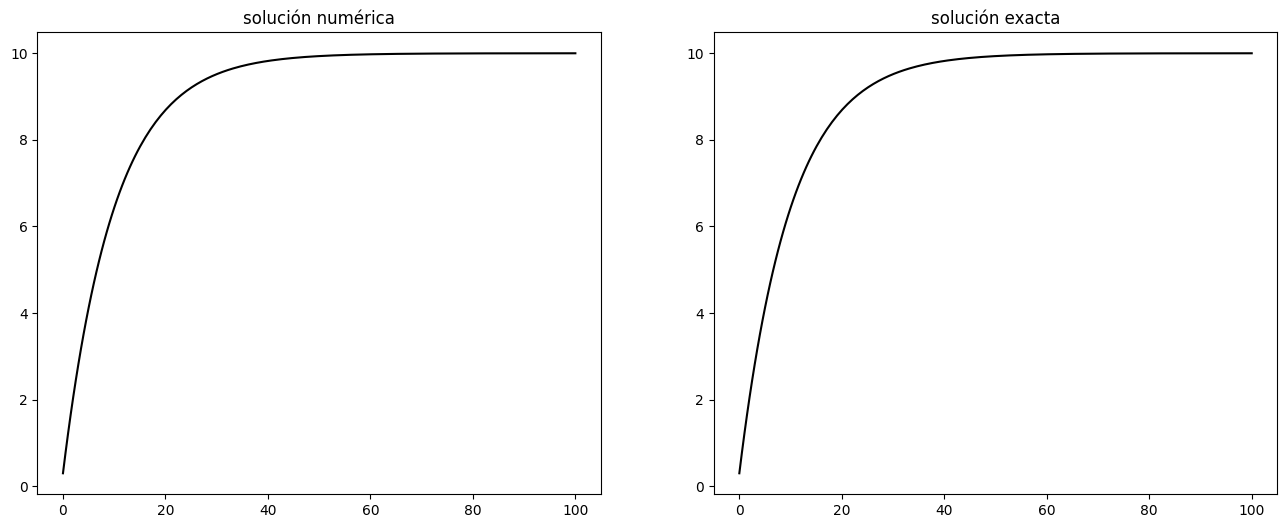

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].plot(t, S_num, label="solución numérica", c="black")
axs[1].plot(t, S_exact, label="solución exacta", c="black")
axs[0].set_title("solución numérica")
axs[1].set_title("solución exacta")
plt.show()

#### ¿Cuál es el efecto de la condición inicial?

#### Suponga funciones del tiempo para $c_{in}$ y grafique

En particular, considere $c_{in}(t)=0.2 + 0.1 sen t$.

In [ ]:
# t
t1 = np.linspace(0, 100, 200)

# condición inicial
S0 = 0.3

In [ ]:
def fn1(S, t1, cin):
    return 2 + np.sin(t1) - S/10

In [ ]:
S_num2 = odeint(fn1, S0, t1, args=(cin,))

In [ ]:
# Solución analítica

S_exact2 = 20 - (10/101)*(10*np.cos(t)-np.sin(t)) + (100/101-19.7)*np.exp(-t/10)

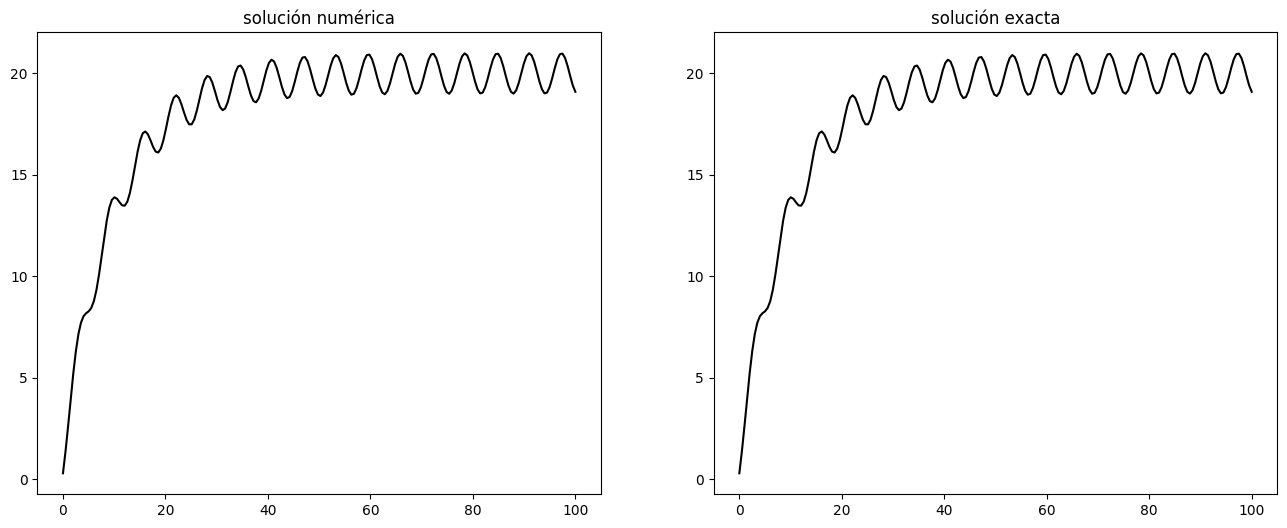

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].plot(t, S_num2, label="solución numérica", c="black")
axs[1].plot(t, S_exact2, label="solución exacta", c="black")
axs[0].set_title("solución numérica")
axs[1].set_title("solución exacta")
plt.show()

## Ejercicio

Encuentre la ecuación diferencial para la concentración de un contaminante en un lago.

Suponga que $C(t)$ es la concentración del contaminante en el lago al tiempo $t$ y sea $F$ la razón a la que el agua fluye en el lago en $m^3/día$.